# Neural Networks
## Fashion MNIST dataset classification






In [30]:
import keras
from keras.models import Sequential # standard Feedworward (sequential) Neural Network

In [31]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Visualise the data

(60000, 28, 28)
(10000, 28, 28)


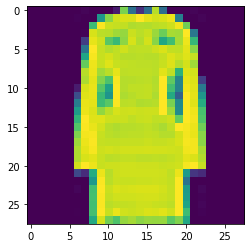

In [32]:
print(x_train.shape)
print(x_test.shape)

import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[500,:,:])

Reshape into 2D array

In [33]:
x_train = x_train.reshape(60000,28**2)
x_test = x_test.reshape(10000,28**2)

Build NN model

In [34]:
from keras.models import Sequential
model = Sequential()

from keras.layers import Dense
model.add(Dense(units=100, activation = 'relu', input_dim=28**2))
model.add(Dense(units=100,activation = 'relu'))
model.add(Dense(units=100,activation = 'relu'))
model.add(Dense(units=100,activation = 'relu'))
model.add(Dense(units=10, activation='softmax'))


Convert output from interger to array of dim=10

In [35]:
print(y_train[0])

y_train = keras.utils.to_categorical(y_train,num_classes=10) 
y_test = keras.utils.to_categorical(y_test,num_classes=10)

print(y_train[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Select 'categorial cross-entropy' as loss function

In [36]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.fit(x_train,y_train, epochs=50, batch_size = 1000)

Epoch 1/50
60/60 [==============================] - 1s 15ms/step - loss: 16.4059 - accuracy: 0.4428
Epoch 2/50
60/60 [==============================] - 1s 15ms/step - loss: 0.9012 - accuracy: 0.7501
Epoch 3/50
60/60 [==============================] - 1s 15ms/step - loss: 0.6923 - accuracy: 0.7840
Epoch 4/50
60/60 [==============================] - 1s 15ms/step - loss: 0.5993 - accuracy: 0.8017
Epoch 5/50
60/60 [==============================] - 1s 15ms/step - loss: 0.5520 - accuracy: 0.8150
Epoch 6/50
60/60 [==============================] - 1s 15ms/step - loss: 0.5026 - accuracy: 0.8266
Epoch 7/50
60/60 [==============================] - 1s 15ms/step - loss: 0.4724 - accuracy: 0.8363
Epoch 8/50
60/60 [==============================] - 1s 15ms/step - loss: 0.4438 - accuracy: 0.8422
Epoch 9/50
60/60 [==============================] - 1s 15ms/step - loss: 0.4239 - accuracy: 0.8498
Epoch 10/50
60/60 [==============================] - 1s 15ms/step - loss: 0.4160 - accuracy: 0.8517
Epoch 11

93% accuracy in training set

In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1010      
Total params: 109,810
Trainable params: 109,810
Non-trainable params: 0
_________________________________________________________________


Evaluate the model's performance

In [39]:
print(model.evaluate(x_test,y_test))
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.8691
[0.4772312641143799, 0.8690999746322632]


87% accuracy in test set

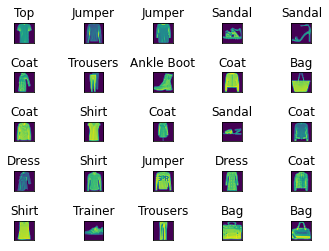

In [40]:
# Visualise NN predictions

N=5
start_val = 403# pick an element for the code to plot the following 25 values
fig, axes = plt.subplots(N,N)
items = ['Top','Trousers','Jumper','Dress','Coat','Sandal','Shirt','Trainer',
         'Bag','Ankle Boot']
for row in range(N):
  for col in range(N):
    pred = np.argmax(y_pred[start_val+row+N*col,:])
    axes[row,col].imshow(x_test[start_val+row+N*col,:].reshape((28,28)))
    axes[row,col].set_title(str(items[pred]))
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])
    
plt.subplots_adjust(hspace=1.5)